In [4]:
#Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Read ALL the csv files
nyc = pd.read_csv('./Resources/new york_AQI_2022.csv')
nyc = nyc.rename(columns={"AQI":"NYC AQI"})

lax = pd.read_csv('./Resources/los angeles_AQI_2022.csv')
lax = lax.rename(columns={"AQI":"LAX AQI"})

chi = pd.read_csv('./Resources/chicago_AQI_2022.csv')
chi = chi.rename(columns={"AQI":"CHI AQI"})

hou = pd.read_csv('./Resources/houston_AQI_2022.csv')
hou = hou.rename(columns={"AQI":"HOU AQI"})

phl = pd.read_csv('./Resources/philadelphia_AQI_2022.csv')
phl = phl.rename(columns={"AQI":"PHL AQI"})

dfw = pd.read_csv('./Resources/dallas_AQI_2022.csv')
dfw = dfw.rename(columns={"AQI":"DFW AQI"})

phx = pd.read_csv('./Resources/phoenix_AQI_2022.csv')
phx = phx.rename(columns={"AQI":"PHX AQI"})

sat = pd.read_csv('./Resources/san antonio_AQI_2022.csv')
sat = sat.rename(columns={"AQI":"SAT AQI"})

san = pd.read_csv('./Resources/san diego_AQI_2022.csv')
san = san.rename(columns={"AQI":"SAN AQI"})

sjc = pd.read_csv('./Resources/san jose_AQI_2022.csv')
sjc = sjc.rename(columns={"AQI":"SJC AQI"})


In [6]:
#Merge CSV Files
#Done one at a time since 10 cities was manageable. Could create a loop for large number of cities
merge = pd.merge(nyc, lax, how='left')
merge = pd.merge(merge, chi, how='left')
merge = pd.merge(merge, hou, how='left')
merge = pd.merge(merge, phl, how='left')
merge = pd.merge(merge, dfw, how='left')
merge = pd.merge(merge, phx, how='left')
merge = pd.merge(merge, sat, how='left')
merge = pd.merge(merge, san, how='left')
all_cities = pd.merge(merge, sjc, how='left')
all_cities = all_cities.fillna(0).astype(int)

#renamed Column to proper label of INDEX
all_cities= all_cities.rename(columns={"Unnamed: 0":"INDEX"})
all_cities = all_cities.set_index("INDEX")

In [7]:
#Save merged CSV that includes ALL cities
all_cities.to_csv(f'AQI_all_cities.csv', index=True)

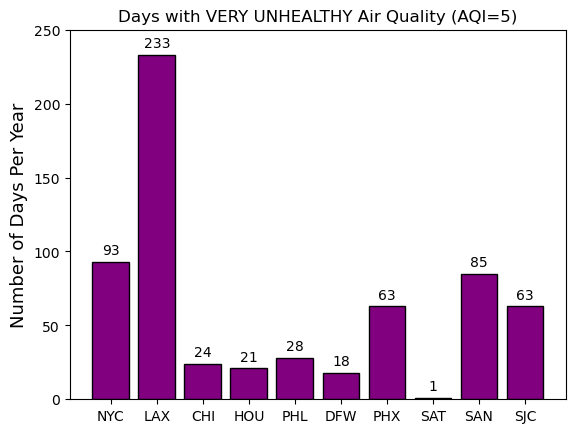

In [8]:
#Create a bar graph for certain AQI level - set AQI in Y axis
x = ['NYC', 'LAX', 'CHI', 'HOU', 'PHL',
       'DFW', 'PHX', 'SAT', 'SAN', 'SJC']

#This Y= points to the row(AQI) value you want to plot
y = all_cities.loc[5]

barplot = plt.bar(x, y, color='purple', align="center", edgecolor="black")
plt.bar_label(barplot, labels=y, label_type="edge", padding=3)
plt.ylim(0,250)
plt.ylabel("Number of Days Per Year", size=13)
plt.title(f"Days with VERY UNHEALTHY Air Quality (AQI=5)", size = 12)
plt.savefig(f"Worst Air Quality Per City.png", transparent=True)
plt.show()